5. We now want to build a social graph where each node corresponds to a hashtag and an edge between hashtag A and hashtag B indicates that there is at least one tweet which contains both hashtag A and hashtag B. Implement a python program that allows you to identify hashtags from Tweet content message and generate the above social network graph.

In [294]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

#deleted #militaryukraine because it has no other connection
hashtags = ['ukrainewar', 'war', 'army', 'military', 'kiev', 'ua', 'specialforces', 'donbass', 'donbasswar', 'airsoft', 'nomockal', 'warukraine', 'tactics', 'azovsea', 'militarystile', 'azov', 'russia', 'donetsk', 'soldiers', 'ukrainenews', 'odessa', 'ukrainianarmy', 'lviv', 'victory', 'nato', 'kyiv', 'militaryukraine', 'news']
tweets = pd.read_csv('tweets_2022-05-08.csv')

dictOfhashtags = { i : [] for i in hashtags }
list_of_matches = []

for index, row in tweets.iterrows():
    list_of_matches.append(set([hashtag_tweet.lower() for hashtag_tweet in ast.literal_eval(row.loc['hashtags'])]).intersection(hashtags))
        


In [295]:
print(list_of_matches)

[{'russia'}, {'tactics'}, {'military'}, {'news'}, {'news'}, {'kyiv'}, {'news'}, {'war'}, {'news'}, {'news'}, {'russia'}, {'nato'}, {'kyiv'}, {'news'}, {'russia'}, {'ukrainewar'}, {'russia'}, {'russia'}, {'news'}, {'war'}, {'news'}, {'news'}, {'news'}, {'news'}, {'news'}, {'news'}, {'russia'}, {'news'}, {'news'}, {'news'}, {'russia'}, {'news'}, {'news'}, {'news'}, {'army'}, {'news'}, {'news'}, {'news'}, {'news'}, {'news'}, {'news'}, {'nato', 'russia'}, {'nato'}, {'russia'}, {'russia'}, {'news'}, {'military'}, {'news'}, {'news'}, {'war'}, {'news'}, {'news'}, {'news'}, {'news'}, {'news'}, {'news'}, {'news'}, {'army'}, {'news'}, {'news'}, {'russia'}, {'kiev'}, {'news'}, {'news'}, {'news'}, {'news'}, {'news'}, {'news'}, {'nato'}, {'azov'}, {'ukrainewar'}, {'nato'}, {'russia'}, {'news'}, {'news'}, {'russia'}, {'azov'}, {'war'}, {'russia'}, {'army'}, {'russia'}, {'russia'}, {'russia'}, {'war'}, {'war'}, {'russia'}, {'nato'}, {'war'}, {'military'}, set(), {'russia'}, {'nato'}, {'odessa'}, {'ta

In [296]:
list_of_matches_with_more_than_one = []
for element in list_of_matches:
    if len(element) >= 2:
        list_of_matches_with_more_than_one.append(element)

In [297]:
print(list_of_matches_with_more_than_one)

[{'nato', 'russia'}, {'kyiv', 'ukrainewar'}, {'ukrainewar', 'russia'}, {'azov', 'russia'}, {'nato', 'odessa', 'azov', 'russia'}, {'azov', 'russia'}, {'news', 'ukrainewar', 'russia'}, {'nato', 'ukrainewar', 'news', 'russia'}, {'news', 'russia'}, {'ukrainewar', 'russia'}, {'azov', 'russia'}, {'nato', 'russia'}, {'war', 'russia'}, {'kyiv', 'kiev'}, {'azov', 'russia'}, {'nato', 'russia'}, {'donetsk', 'russia'}, {'ukrainewar', 'kiev', 'russia', 'odessa'}, {'donbass', 'azov'}, {'kiev', 'russia'}, {'war', 'russia'}, {'war', 'ukrainewar'}, {'kyiv', 'kiev'}, {'ukrainewar', 'russia'}, {'kyiv', 'ukrainewar', 'kiev', 'odessa'}, {'kyiv', 'ukrainewar'}, {'war', 'azov'}, {'odessa', 'donbass', 'russia'}, {'military', 'russia'}, {'ukrainewar', 'russia'}, {'ukrainewar', 'russia'}, {'kyiv', 'russia'}, {'nato', 'news', 'russia'}, {'ukrainewar', 'russia'}, {'news', 'russia'}, {'news', 'russia'}, {'donetsk', 'russia'}, {'nato', 'russia'}, {'kyiv', 'news', 'russia'}, {'ukrainianarmy', 'warukraine', 'ukrainew

In [298]:
import itertools

combis = []

for element in list_of_matches_with_more_than_one:
    combis.append(list(itertools.combinations(element, 2)))

print(combis)

[[('nato', 'russia')], [('kyiv', 'ukrainewar')], [('ukrainewar', 'russia')], [('azov', 'russia')], [('nato', 'odessa'), ('nato', 'azov'), ('nato', 'russia'), ('odessa', 'azov'), ('odessa', 'russia'), ('azov', 'russia')], [('azov', 'russia')], [('news', 'ukrainewar'), ('news', 'russia'), ('ukrainewar', 'russia')], [('nato', 'ukrainewar'), ('nato', 'news'), ('nato', 'russia'), ('ukrainewar', 'news'), ('ukrainewar', 'russia'), ('news', 'russia')], [('news', 'russia')], [('ukrainewar', 'russia')], [('azov', 'russia')], [('nato', 'russia')], [('war', 'russia')], [('kyiv', 'kiev')], [('azov', 'russia')], [('nato', 'russia')], [('donetsk', 'russia')], [('ukrainewar', 'kiev'), ('ukrainewar', 'russia'), ('ukrainewar', 'odessa'), ('kiev', 'russia'), ('kiev', 'odessa'), ('russia', 'odessa')], [('donbass', 'azov')], [('kiev', 'russia')], [('war', 'russia')], [('war', 'ukrainewar')], [('kyiv', 'kiev')], [('ukrainewar', 'russia')], [('kyiv', 'ukrainewar'), ('kyiv', 'kiev'), ('kyiv', 'odessa'), ('ukr

In [299]:
flattened = [val for sublist in combis for val in sublist]
print(flattened)

[('nato', 'russia'), ('kyiv', 'ukrainewar'), ('ukrainewar', 'russia'), ('azov', 'russia'), ('nato', 'odessa'), ('nato', 'azov'), ('nato', 'russia'), ('odessa', 'azov'), ('odessa', 'russia'), ('azov', 'russia'), ('azov', 'russia'), ('news', 'ukrainewar'), ('news', 'russia'), ('ukrainewar', 'russia'), ('nato', 'ukrainewar'), ('nato', 'news'), ('nato', 'russia'), ('ukrainewar', 'news'), ('ukrainewar', 'russia'), ('news', 'russia'), ('news', 'russia'), ('ukrainewar', 'russia'), ('azov', 'russia'), ('nato', 'russia'), ('war', 'russia'), ('kyiv', 'kiev'), ('azov', 'russia'), ('nato', 'russia'), ('donetsk', 'russia'), ('ukrainewar', 'kiev'), ('ukrainewar', 'russia'), ('ukrainewar', 'odessa'), ('kiev', 'russia'), ('kiev', 'odessa'), ('russia', 'odessa'), ('donbass', 'azov'), ('kiev', 'russia'), ('war', 'russia'), ('war', 'ukrainewar'), ('kyiv', 'kiev'), ('ukrainewar', 'russia'), ('kyiv', 'ukrainewar'), ('kyiv', 'kiev'), ('kyiv', 'odessa'), ('ukrainewar', 'kiev'), ('ukrainewar', 'odessa'), ('ki

In [300]:
edges = []
for l in flattened:
    edge = sorted ((l[0],l[1]))
    edge = tuple(edge)
    if edge not in edges:
        edges.append(edge)

print(edges)

[('nato', 'russia'), ('kyiv', 'ukrainewar'), ('russia', 'ukrainewar'), ('azov', 'russia'), ('nato', 'odessa'), ('azov', 'nato'), ('azov', 'odessa'), ('odessa', 'russia'), ('news', 'ukrainewar'), ('news', 'russia'), ('nato', 'ukrainewar'), ('nato', 'news'), ('russia', 'war'), ('kiev', 'kyiv'), ('donetsk', 'russia'), ('kiev', 'ukrainewar'), ('odessa', 'ukrainewar'), ('kiev', 'russia'), ('kiev', 'odessa'), ('azov', 'donbass'), ('ukrainewar', 'war'), ('kyiv', 'odessa'), ('azov', 'war'), ('donbass', 'odessa'), ('donbass', 'russia'), ('military', 'russia'), ('kyiv', 'russia'), ('kyiv', 'news'), ('ukrainianarmy', 'warukraine'), ('ukrainewar', 'ukrainianarmy'), ('news', 'ukrainianarmy'), ('ukrainewar', 'warukraine'), ('news', 'warukraine'), ('military', 'war'), ('azov', 'kiev'), ('news', 'war'), ('news', 'ukrainenews'), ('ukrainenews', 'ukrainewar'), ('russia', 'ukrainenews'), ('donbass', 'kiev'), ('nato', 'war'), ('kyiv', 'war'), ('ukrainianarmy', 'war'), ('russia', 'ukrainianarmy'), ('kiev',

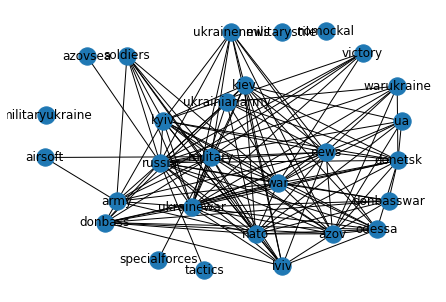

In [301]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(hashtags)
G.add_edges_from(edges)

pos = nx.spring_layout(G, k=2.5, iterations=50)
nx.draw(G, pos, with_labels = True)

Task 6: main global properties

In [302]:
import statistics

print(f'Nodes: {G.number_of_nodes()}')
print(f'Edges: {G.number_of_edges()}')
print(f'Degree Centrality: {nx.degree_centrality(G)}')
average_degree_centrality = statistics.mean([x for x in nx.degree_centrality(G).values()])
print(f'Average degree centrality: {average_degree_centrality}')
print(f'Diameter: {nx.diameter(G0)}')
print(f'Clustering Coefficient: {nx.clustering(G)}')
print(f'Average Clustering Coefficient: {nx.average_clustering(G)}')

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

print(f'Nodes of largest component: {G0.number_of_nodes()}')

data = [['Nodes', G.number_of_nodes()],
        ['Edges', G.number_of_edges()],
        ['Average degree centrality', statistics.mean([x for x in nx.degree_centrality(G).values()])],
        ['Diameter', nx.diameter(G0)],
        ['Average Clustering Coefficient', nx.average_clustering(G)],
        ['Size largest component', G0.number_of_nodes()]]

Nodes: 28
Edges: 133
Degree Centrality: {'ukrainewar': 0.7407407407407407, 'war': 0.6666666666666666, 'army': 0.3333333333333333, 'military': 0.5925925925925926, 'kiev': 0.5185185185185185, 'ua': 0.25925925925925924, 'specialforces': 0.037037037037037035, 'donbass': 0.4444444444444444, 'donbasswar': 0.25925925925925924, 'airsoft': 0.07407407407407407, 'nomockal': 0.0, 'warukraine': 0.25925925925925924, 'tactics': 0.037037037037037035, 'azovsea': 0.037037037037037035, 'militarystile': 0.0, 'azov': 0.5925925925925926, 'russia': 0.8148148148148148, 'donetsk': 0.5185185185185185, 'soldiers': 0.2962962962962963, 'ukrainenews': 0.3333333333333333, 'odessa': 0.4074074074074074, 'ukrainianarmy': 0.25925925925925924, 'lviv': 0.4444444444444444, 'victory': 0.2222222222222222, 'nato': 0.6296296296296295, 'kyiv': 0.5555555555555556, 'militaryukraine': 0.0, 'news': 0.5185185185185185}
Average degree centrality: 0.35185185185185186
Diameter: 3
Clustering Coefficient: {'ukrainewar': 0.568421052631578

In [303]:
from tabulate import tabulate

print(tabulate(data, headers=['Property', 'Value'], tablefmt='fancy_grid'))

╒════════════════════════════════╤════════════╕
│ Property                       │      Value │
╞════════════════════════════════╪════════════╡
│ Nodes                          │  28        │
├────────────────────────────────┼────────────┤
│ Edges                          │ 133        │
├────────────────────────────────┼────────────┤
│ Average degree centrality      │   0.351852 │
├────────────────────────────────┼────────────┤
│ Diameter                       │   3        │
├────────────────────────────────┼────────────┤
│ Average Clustering Coefficient │   0.625247 │
├────────────────────────────────┼────────────┤
│ Size largest component         │  25        │
╘════════════════════════════════╧════════════╛


Task 7: degree distribution and local clustering coefficient distribution

In [304]:
data2 = []

degree_centrality = nx.degree_centrality(G)
clustering_coefficient = nx.clustering(G)

for key in degree_centrality.keys():
    data2.append([key, degree_centrality[key], clustering_coefficient[key]])

print(tabulate(data2, headers=['Node', 'Degree Centrality', 'Clustering Centrality'], tablefmt='fancy_grid'))

╒═════════════════╤═════════════════════╤═════════════════════════╕
│ Node            │   Degree Centrality │   Clustering Centrality │
╞═════════════════╪═════════════════════╪═════════════════════════╡
│ ukrainewar      │           0.740741  │                0.568421 │
├─────────────────┼─────────────────────┼─────────────────────────┤
│ war             │           0.666667  │                0.588235 │
├─────────────────┼─────────────────────┼─────────────────────────┤
│ army            │           0.333333  │                0.694444 │
├─────────────────┼─────────────────────┼─────────────────────────┤
│ military        │           0.592593  │                0.566667 │
├─────────────────┼─────────────────────┼─────────────────────────┤
│ kiev            │           0.518519  │                0.813187 │
├─────────────────┼─────────────────────┼─────────────────────────┤
│ ua              │           0.259259  │                1        │
├─────────────────┼─────────────────────┼───────

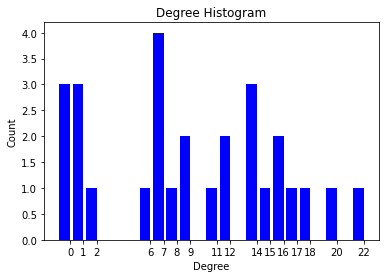

In [305]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)


plt.show()

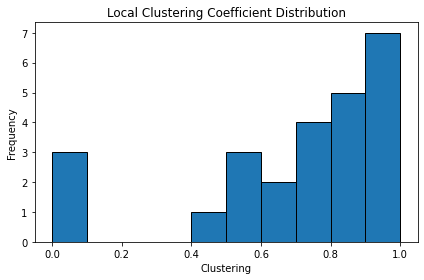

In [306]:
from matplotlib.cm import ScalarMappable

gc = G.subgraph(max(nx.connected_components(G)))
lcc = nx.clustering(gc)

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

ax1.hist(lcc.values(), bins=10, edgecolor = 'black')
ax1.set_xlabel('Clustering')
ax1.set_ylabel('Frequency')

plt.title("Local Clustering Coefficient Distribution")
plt.tight_layout()
plt.show()

Task 8: communities

In [307]:
communities = nx.algorithms.community.label_propagation_communities(G)

In [308]:
print(communities)

dict_values([{'kiev', 'specialforces', 'ukrainianarmy', 'russia', 'warukraine', 'donbasswar', 'war', 'donbass', 'azov', 'azovsea', 'donetsk', 'ukrainewar', 'odessa', 'victory', 'ukrainenews', 'lviv', 'tactics', 'military', 'airsoft', 'ua', 'nato', 'news', 'soldiers', 'kyiv', 'army'}, {'nomockal'}, {'militarystile'}, {'militaryukraine'}])


In [309]:
list_communities = list(communities)
subgraph1 = G.subgraph(list_communities[0])
subgraph2 = G.subgraph(list_communities[1])

In [310]:
data_subgraph1 = [['Nodes', subgraph1.number_of_nodes()],
                    ['Edges', subgraph1.number_of_edges()],
                    ['Average degree centrality', statistics.mean([x for x in nx.degree_centrality(subgraph1).values()])],
                    ['Diameter', nx.diameter(subgraph1)],
                    ['Average Clustering Coefficient', nx.average_clustering(subgraph1)]]

data_subgraph2 = [['Nodes', subgraph2.number_of_nodes()],
                    ['Edges', subgraph2.number_of_edges()],
                    ['Average degree centrality', statistics.mean([x for x in nx.degree_centrality(subgraph2).values()])],
                    ['Diameter', nx.diameter(subgraph2)],
                    ['Average Clustering Coefficient', nx.average_clustering(subgraph2)]]

In [311]:
print(tabulate(data_subgraph1, headers=['Property Community 1', 'Value'], tablefmt='fancy_grid'))

print(tabulate(data_subgraph2, headers=['Property Community 2', 'Value'], tablefmt='fancy_grid'))

╒════════════════════════════════╤════════════╕
│ Property Community 1           │      Value │
╞════════════════════════════════╪════════════╡
│ Nodes                          │  25        │
├────────────────────────────────┼────────────┤
│ Edges                          │ 133        │
├────────────────────────────────┼────────────┤
│ Average degree centrality      │   0.443333 │
├────────────────────────────────┼────────────┤
│ Diameter                       │   3        │
├────────────────────────────────┼────────────┤
│ Average Clustering Coefficient │   0.700277 │
╘════════════════════════════════╧════════════╛
╒════════════════════════════════╤═════════╕
│ Property Community 2           │   Value │
╞════════════════════════════════╪═════════╡
│ Nodes                          │       1 │
├────────────────────────────────┼─────────┤
│ Edges                          │       0 │
├────────────────────────────────┼─────────┤
│ Average degree centrality      │       1 │
├───────────────

Task 9: Botometer Analysis

In [312]:
sorted_degree_centrality = {k: v for k, v in sorted(nx.degree_centrality(G).items(), key=lambda item: item[1], reverse=True)}

In [313]:
print(sorted_degree_centrality)

{'russia': 0.8148148148148148, 'ukrainewar': 0.7407407407407407, 'war': 0.6666666666666666, 'nato': 0.6296296296296295, 'military': 0.5925925925925926, 'azov': 0.5925925925925926, 'kyiv': 0.5555555555555556, 'kiev': 0.5185185185185185, 'donetsk': 0.5185185185185185, 'news': 0.5185185185185185, 'donbass': 0.4444444444444444, 'lviv': 0.4444444444444444, 'odessa': 0.4074074074074074, 'army': 0.3333333333333333, 'ukrainenews': 0.3333333333333333, 'soldiers': 0.2962962962962963, 'ua': 0.25925925925925924, 'donbasswar': 0.25925925925925924, 'warukraine': 0.25925925925925924, 'ukrainianarmy': 0.25925925925925924, 'victory': 0.2222222222222222, 'airsoft': 0.07407407407407407, 'specialforces': 0.037037037037037035, 'tactics': 0.037037037037037035, 'azovsea': 0.037037037037037035, 'nomockal': 0.0, 'militarystile': 0.0, 'militaryukraine': 0.0}


In [314]:
rank_10_hashtags = [x for x in sorted_degree_centrality.keys()]
rank_10_hashtags = rank_10_hashtags[:10]

list_of_usernames = {}

for index, row in tweets.iterrows():
    intersection = set([hashtag_tweet.lower() for hashtag_tweet in ast.literal_eval(row.loc['hashtags'])]).intersection(rank_10_hashtags)
    if len(intersection) > 0:
        list_of_usernames[row.loc['username']] = {'hashtag':[x for x in intersection]}


In [332]:
print(f'usernames: {len(list_of_usernames)}')

usernames: 7468


In [317]:
import botometer
import random

rapidapi_key = "6a7c8570f3mshe25c454132d8231p19a690jsnfdc9e513444b"
twitter_app_auth = {
    'consumer_key': 'rI6ajT1sZdu3DD0G92k2cOzpk',
    'consumer_secret': '391VTODkfp8y9PIYOs4CVj4elrdjLk6hKPawQxZWVLiqzBYH99',
    'access_token': '1508709948766699525-kYtl83OTJgaQcwRK6Yl8q4PH3rHfD6',
    'access_token_secret': 'UEpHsWoEbazRLZZ47T39nGDvpSyPQY0lalStqvH10gm5P',
  }

bom = botometer.Botometer(wait_on_ratelimit=True,
                          rapidapi_key=rapidapi_key,
                          **twitter_app_auth)

accounts = [key for (key,value) in list_of_usernames.items()]

sample = random.choices(accounts, k=500)
sample_at = [''.join(['@', s]) for s in sample]

results = bom.check_accounts_in(sample_at)


In [318]:
values = []

for username, result in results:
    if 'cap' in result.keys():
        print(result['cap'])
        values.append(statistics.mean([x for x in result['cap'].values()]))

{'english': 0.8670116134145492, 'universal': 0.8421031637823202}
{'english': 0.795728227940139, 'universal': 0.8053085767533751}
{'english': 0.7907586934369296, 'universal': 0.8054210927612583}
{'english': 0.7384783166429812, 'universal': 0.5742686032713971}
{'english': 0.8457543526336647, 'universal': 0.8327856038833207}
{'english': 0.7546218700467833, 'universal': 0.6608500314332488}
{'english': 0.8670116134145492, 'universal': 0.859576255252869}
{'english': 0.7983123643488195, 'universal': 0.7828265255249504}
{'english': 0.7920317685697057, 'universal': 0.7219510972984345}
{'english': 0.793087009461318, 'universal': 0.8045992970534486}
{'english': 0.8395863545645614, 'universal': 0.8327856038833207}
{'english': 0.8287549877594508, 'universal': 0.82211302959919}
{'english': 0.8670116134145492, 'universal': 0.8733944954488508}
{'english': 0.7907586934369296, 'universal': 0.5222398722127631}
{'english': 0.3912159239072283, 'universal': 0.5742686032713971}
{'english': 0.8395863545645614

KeyError: 'cap'

In [319]:
print(values)

[0.8545573885984348, 0.8005184023467571, 0.798089893099094, 0.6563734599571891, 0.8392699782584927, 0.707735950740016, 0.8632939343337092, 0.790569444936885, 0.7569914329340701, 0.7988431532573833, 0.836185979223941, 0.8254340086793204, 0.8702030544317001, 0.6564992828248464, 0.4827422635893127, 0.8090179264527013, 0.8559905092055176, 0.7987504273065973, 0.38059393126369395, 0.8012465708022928, 0.737605573619228, 0.39743378790887185, 0.7803790256815665, 0.7971509515332202, 0.8705740209503363, 0.7566273972957075, 0.9481936191275496, 0.8009217614836354, 0.748191649149438, 0.7000682611537116, 0.523884028816744, 0.5422983692723786, 0.5447667871305896, 0.768283251497607, 0.6116913099233372, 0.555676073169674, 0.707735950740016, 0.798003260924435, 0.8182052434989644, 0.24268314706896704, 0.8004586368686701, 0.7913013853094877, 0.6991801586594746, 0.8084939204914898, 0.7894673089615445, 0.9019275730202523, 0.7899512168417706, 0.664235170573013, 0.7934095855793872, 0.8011923859986632, 0.793559

In [331]:
print(f'Number of samples {len(values)}')

Number of samples 329


In [320]:
rounded_values = [round(num) for num in values]
print(rounded_values)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]


In [329]:
print(f'Bots: {rounded_values.count(1)}')
print(f'No Bots: {rounded_values.count(0)}')

Bots: 310
No Bots: 19


In [321]:
for i, value in enumerate(rounded_values):
    list_of_usernames[sample[i]]['bot'] = value

In [324]:
print(list_of_usernames)

{'worldbankdata': {'hashtag': ['russia']}, 'VanguardMag': {'hashtag': ['military']}, 'ReviewingNews': {'hashtag': ['news']}, 'JPeterUNI': {'hashtag': ['news']}, 'KozysKorner': {'hashtag': ['kyiv']}, 'stratorob': {'hashtag': ['news']}, 'vivalabonbon': {'hashtag': ['war']}, 'AcousticWorshi7': {'hashtag': ['news']}, 'United_Radio': {'hashtag': ['news']}, 'LottoCluesCom': {'hashtag': ['russia']}, 'KyleWin16520692': {'hashtag': ['nato']}, 'TWMCLtd': {'hashtag': ['azov']}, 'CryptoETC7': {'hashtag': ['ukrainewar']}, 'noYOUhush': {'hashtag': ['russia']}, 'techinjektion': {'hashtag': ['news']}, 'Legaartis': {'hashtag': ['war']}, 'GossipAddictUS': {'hashtag': ['news']}, 'Emergenza24': {'hashtag': ['russia']}, 'skunkradiolive': {'hashtag': ['news'], 'bot': 1}, 'JJWvanWaning': {'hashtag': ['nato', 'russia']}, 'Koltris2': {'hashtag': ['nato']}, 'CDHKedition': {'hashtag': ['russia']}, 'Grumpy__Skipper': {'hashtag': ['russia']}, 'poandpo': {'hashtag': ['news']}, 'kalique36411019': {'hashtag': ['milit

In [325]:
hashtag_bot = { i : [] for i in hashtags }

for s in sample:
    for h in list_of_usernames[s]['hashtag']:
        if 'bot' in list_of_usernames[s]:
            hashtag_bot[h].append(list_of_usernames[s]['bot'])

print(hashtag_bot)

{'ukrainewar': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'war': [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], 'army': [], 'military': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'kiev': [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], 'ua': [], 'specialforces': [], 'donbass': [], 'donbasswar': [], 'airsoft': [], 'nomockal': [], 'warukraine': [], 'tactics': [], 'azovsea': [], 'militarystile': [], 'azov': [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'russia': [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1], 'donetsk': [1, 1, 1], 'soldiers': [], 'ukrainenews': [], 'odessa': [], 'ukrainianarmy': [], 'lviv': [], 'victory': [], 'nato': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 

In [326]:
hashtag_bot_dict = { i : {} for i in hashtags }

for key in hashtag_bot.keys():
    hashtag_bot_dict[key]['bot'] = hashtag_bot[key].count(1)
    hashtag_bot_dict[key]['no_bot'] = hashtag_bot[key].count(0)

print(hashtag_bot_dict)

{'ukrainewar': {'bot': 11, 'no_bot': 0}, 'war': {'bot': 9, 'no_bot': 2}, 'army': {'bot': 0, 'no_bot': 0}, 'military': {'bot': 10, 'no_bot': 0}, 'kiev': {'bot': 14, 'no_bot': 2}, 'ua': {'bot': 0, 'no_bot': 0}, 'specialforces': {'bot': 0, 'no_bot': 0}, 'donbass': {'bot': 0, 'no_bot': 0}, 'donbasswar': {'bot': 0, 'no_bot': 0}, 'airsoft': {'bot': 0, 'no_bot': 0}, 'nomockal': {'bot': 0, 'no_bot': 0}, 'warukraine': {'bot': 0, 'no_bot': 0}, 'tactics': {'bot': 0, 'no_bot': 0}, 'azovsea': {'bot': 0, 'no_bot': 0}, 'militarystile': {'bot': 0, 'no_bot': 0}, 'azov': {'bot': 14, 'no_bot': 2}, 'russia': {'bot': 104, 'no_bot': 8}, 'donetsk': {'bot': 3, 'no_bot': 0}, 'soldiers': {'bot': 0, 'no_bot': 0}, 'ukrainenews': {'bot': 0, 'no_bot': 0}, 'odessa': {'bot': 0, 'no_bot': 0}, 'ukrainianarmy': {'bot': 0, 'no_bot': 0}, 'lviv': {'bot': 0, 'no_bot': 0}, 'victory': {'bot': 0, 'no_bot': 0}, 'nato': {'bot': 41, 'no_bot': 3}, 'kyiv': {'bot': 15, 'no_bot': 3}, 'militaryukraine': {'bot': 0, 'no_bot': 0}, 'news'

In [327]:
hashtag_bot_dict_short = {key: value for key, value in hashtag_bot_dict.items() if hashtag_bot_dict[key]['bot'] > 0 or hashtag_bot_dict[key]['no_bot'] > 0}
print(hashtag_bot_dict_short)

{'ukrainewar': {'bot': 11, 'no_bot': 0}, 'war': {'bot': 9, 'no_bot': 2}, 'military': {'bot': 10, 'no_bot': 0}, 'kiev': {'bot': 14, 'no_bot': 2}, 'azov': {'bot': 14, 'no_bot': 2}, 'russia': {'bot': 104, 'no_bot': 8}, 'donetsk': {'bot': 3, 'no_bot': 0}, 'nato': {'bot': 41, 'no_bot': 3}, 'kyiv': {'bot': 15, 'no_bot': 3}, 'news': {'bot': 123, 'no_bot': 0}}


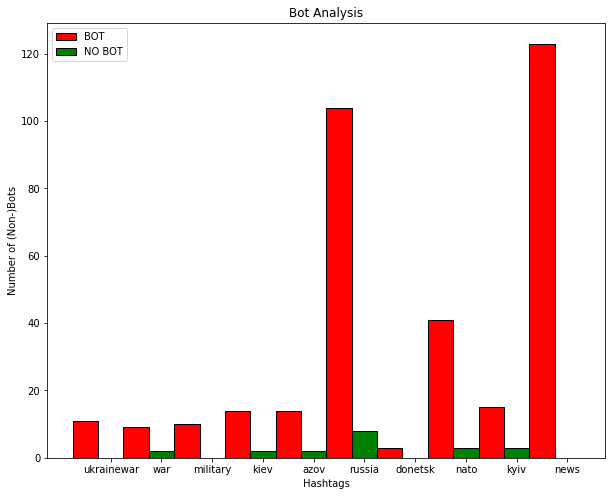

In [328]:
import matplotlib.pyplot as plt
import numpy as np
  
# set width of bar
barWidth = 0.5
fig = plt.subplots(figsize =(10, 8))
 
# set height of bar
x = hashtag_bot_dict_short.keys()
BOT = [x['bot'] for x in hashtag_bot_dict_short.values()]
NO_BOT = [x['no_bot'] for x in hashtag_bot_dict_short.values()]
 
# Set position of bar on X axis
br1 = np.arange(len(BOT))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, BOT, color ='r', width = barWidth,
        edgecolor ='black', label ='BOT')
plt.bar(br2, NO_BOT, color ='g', width = barWidth,
        edgecolor ='black', label ='NO BOT')
 
# Adding Xticks
plt.title('Bot Analysis')
plt.xlabel('Hashtags')
plt.ylabel('Number of (Non-)Bots')
plt.xticks([r + barWidth for r in range(len(BOT))],
        [key for key in hashtag_bot_dict_short.keys()])
 
plt.legend()
plt.show()


Task 10: Support

In [333]:
import math

dictOfhashtags_support = { i : {'retweets': 0, 'replies': 0} for i in hashtags }
temp_list_of_matches = []

for index, row in tweets.iterrows():
    row.loc['hashtags']
    list_of_matches = list(set([hashtag_tweet.lower() for hashtag_tweet in ast.literal_eval(row.loc['hashtags'])]).intersection(hashtags))
    for tag in list_of_matches:
        dictOfhashtags_support[tag]['retweets'] += int(row.loc['retweet_count'])
        if not math.isnan(row.loc['replies']):
            dictOfhashtags_support[tag]['replies'] += 1

In [ ]:
print(dictOfhashtags_support)

{'ukrainewar': {'retweets': 1003, 'replies': 61}, 'war': {'retweets': 3239, 'replies': 103}, 'army': {'retweets': 1042, 'replies': 84}, 'military': {'retweets': 237, 'replies': 6}, 'kiev': {'retweets': 1144, 'replies': 62}, 'ua': {'retweets': 15, 'replies': 9}, 'specialforces': {'retweets': 7, 'replies': 0}, 'donbass': {'retweets': 537, 'replies': 68}, 'donbasswar': {'retweets': 0, 'replies': 1}, 'airsoft': {'retweets': 23, 'replies': 1}, 'nomockal': {'retweets': 0, 'replies': 0}, 'warukraine': {'retweets': 12, 'replies': 0}, 'tactics': {'retweets': 25, 'replies': 4}, 'azovsea': {'retweets': 0, 'replies': 1}, 'militarystile': {'retweets': 0, 'replies': 0}, 'azov': {'retweets': 5962, 'replies': 220}, 'russia': {'retweets': 11603, 'replies': 794}, 'donetsk': {'retweets': 91, 'replies': 18}, 'soldiers': {'retweets': 18, 'replies': 1}, 'ukrainenews': {'retweets': 26, 'replies': 1}, 'odessa': {'retweets': 634, 'replies': 37}, 'ukrainianarmy': {'retweets': 164, 'replies': 4}, 'lviv': {'retwe